In [4]:
# Import libraries and setup
import requests
import matplotlib.pyplot as plt
import time

In [5]:
# Track ISS location data
print("Starting ISS tracking...")

lat_data = []
lon_data = []
time_data = []

url = "https://api.wheretheiss.at/v1/satellites/25544"

# Obtain 100 data points
for i in range(100):
    try:
        # Make API request
        response = requests.get(url)
        
        # Check if request was successful
        if response.status_code == 200:
            data = response.json()
            
            # Extract and store data
            lat = data["latitude"]
            lon = data["longitude"]
            timestamp = data["timestamp"]
            lat_data.append(lat)
            lon_data.append(lon)
            time_data.append(timestamp)
            
            # Output every data point
            if (i + 1) % 1 == 0:
                print(f"{i+1}/100th data point - Latitude: {lat}, Longitude: {lon}, Timestamp: {timestamp}")
            
            # Wait 10 seconds before pinging again
            if i < 100:
                time.sleep(1)
        else:
            print(f"API error at point {i+1}: Status code {response.status_code}")
            
    except Exception as e:
        print(f"Error at point {i+1}: {e}")
        break

print(f"ISS Tracking accomplished. {len(lat_data)}/100 data points collected.")

Starting ISS tracking...
1/100th data point - Latitude: 3.3644151132875, Longitude: 7.8379365774266, Timestamp: 1758116931
2/100th data point - Latitude: 3.4663900797101, Longitude: 7.9101197474726, Timestamp: 1758116933
3/100th data point - Latitude: 3.5683562047304, Longitude: 7.9823189059932, Timestamp: 1758116935
4/100th data point - Latitude: 3.8742137646001, Longitude: 8.1990275652068, Timestamp: 1758116941
5/100th data point - Latitude: 3.9761506026716, Longitude: 8.2713015749385, Timestamp: 1758116943
6/100th data point - Latitude: 4.1290410663849, Longitude: 8.3797502240226, Timestamp: 1758116946
7/100th data point - Latitude: 4.2309599188439, Longitude: 8.4520766124847, Timestamp: 1758116948
8/100th data point - Latitude: 4.3838193277108, Longitude: 8.5606040410113, Timestamp: 1758116951
9/100th data point - Latitude: 4.587603316465, Longitude: 8.7053861391986, Timestamp: 1758116955
10/100th data point - Latitude: 4.842279141326, Longitude: 8.8864921010493, Timestamp: 1758116

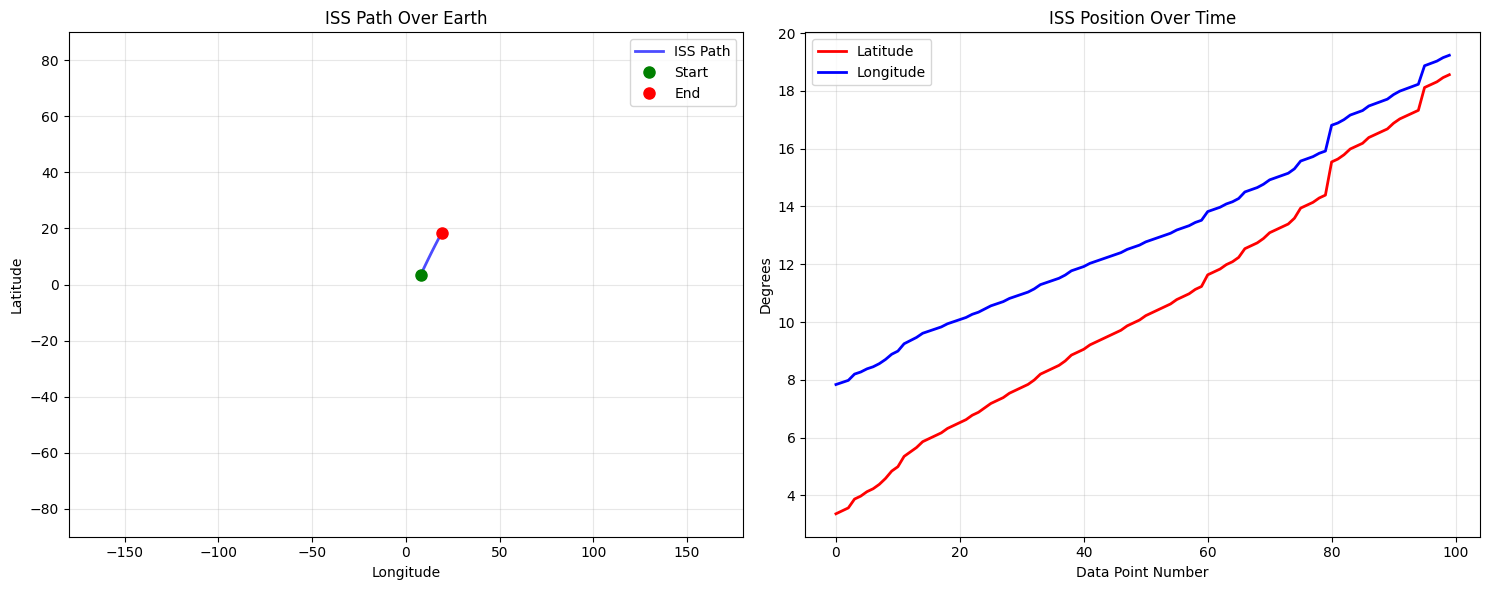

<Figure size 640x480 with 0 Axes>

In [6]:
# Cell 3: Visualize ISS path
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: ISS Path on World Map
ax1.plot(lon_data, lat_data, 'b-', linewidth=2, alpha=0.7, label='ISS Path')
ax1.plot(lon_data[0], lat_data[0], 'go', markersize=8, label='Start')
ax1.plot(lon_data[-1], lat_data[-1], 'ro', markersize=8, label='End')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('ISS Path Over Earth')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-180, 180)
ax1.set_ylim(-90, 90)

# Plot 2: Latitude and Longitude over Time
time_points = range(len(time_data))
ax2.plot(time_points, lat_data, 'r-', label='Latitude', linewidth=2)
ax2.plot(time_points, lon_data, 'b-', label='Longitude', linewidth=2)
ax2.set_xlabel('Data Point Number')
ax2.set_ylabel('Degrees')
ax2.set_title('ISS Position Over Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()